In [44]:
struct LogisticRegression

     learning_rate :: Float64
     epochs :: Int
     w :: Vector{Float64}
     b :: Float64

     function LogisticRegression(x, y; learning_rate = 0.01, epochs=10000)
        m, n = size(x)
        w = zeros(n)
        b = 0

        for i in 1:epochs
            ypred = sigmoid(x * w .+ b)
            gradient = x' * (ypred - y) ./ m
            w .-= learning_rate * gradient
            b -= learning_rate * sum(ypred - y) / m
            cost = compute_cost(y, ypred)
            if i % 1000 == 0
                println("Iteration $i: Cost = $(cost)")
            end
        end

        new( learning_rate, epochs, w, b)
    end

end
       
sigmoid(z) = 1 ./ (1 .+ exp.(-z))

function compute_cost(y, ypred)  
    m = length(y)
    - sum(y .* log.(ypred) .* (1 .- y) .* log.(1 .- ypred)) ./ m
end

function predict(model, x)
    ypred = sigmoid(x * model.w .+ model.b)
    return round.(Int, ypred)
end




predict (generic function with 1 method)

In [45]:
using Plots
using Random

n = 1000

rng = Xoshiro(1234)

w = [2, -1]
b = 1.

function generate_data(n, w, b)
  
    k = length(w)
    x = randn(rng, n, k)
    y = round.(Int, sigmoid.(- x * w .+ b) .> rand(rng, n))
    
    return y, x
    
end

y, x = generate_data(n, w, b)
size(x)

(1000, 2)

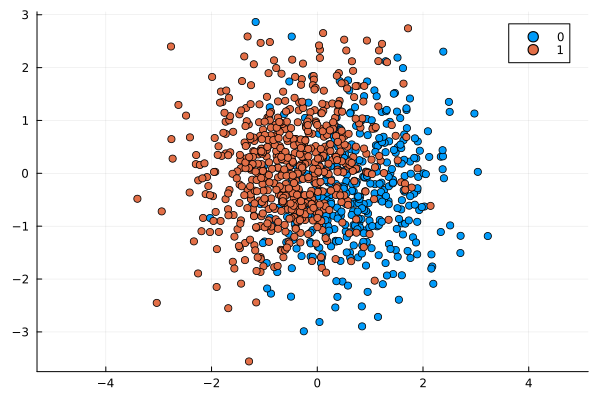

In [46]:
scatter(x[:, 1], x[:, 2], group = y, aspect_ratio = 1)

In [47]:
model = LogisticRegression(x, y)

Iteration 1000: Cost = -0.0
Iteration 2000: Cost = -0.0
Iteration 3000: Cost = -0.0
Iteration 4000: Cost = -0.0
Iteration 5000: Cost = -0.0
Iteration 6000: Cost = -0.0
Iteration 7000: Cost = -0.0
Iteration 8000: Cost = -0.0
Iteration 9000: Cost = -0.0
Iteration 10000: Cost = -0.0


LogisticRegression(0.01, 10000, [-1.88047752019024, 0.8203574537416363], 0.8179267986983213)

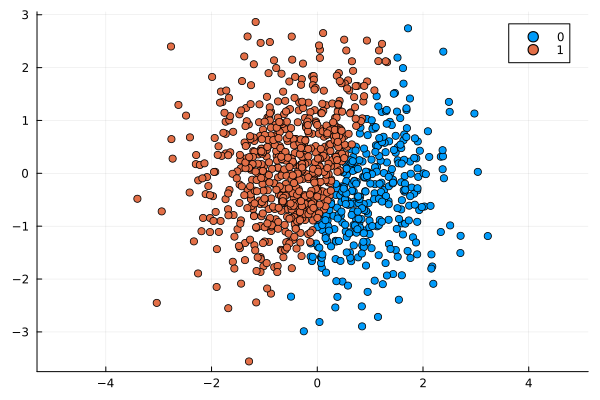

In [48]:
ypred = predict(model, x)
scatter(x[:,1], x[:,2], group=ypred, aspect_ratio=1)